DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  392 non-null    object
 1   text      392 non-null    object
dtypes: object(2)
memory usage: 6.3+ KB

First few rows of the DataFrame:
                       filename   
0          10.1002@bmc.1155.pdf  \
1  10.1002@bscb.19810900913.pdf   
2    10.1002@cbdv.200590016.pdf   
3    10.1002@cbdv.200800342.pdf   
4    10.1002@cbdv.201000011.pdf   

                                                text  
0  Research Article\nReceived: 15 July 2008,\nRev...  
1  Bull. SOC. Chim. Belg. vo1.90/n0 9/1981 \nSTUD...  
2   \t\n\r  ...  
3  Casearin X, Its Degradation Product and Other ...  
4  Chemical Constituents of Papulaspora immersa, ...  

Summary of text lengths:
count      392.000000
mean     19737.464286
std      10330.029305
min          0.000000
2

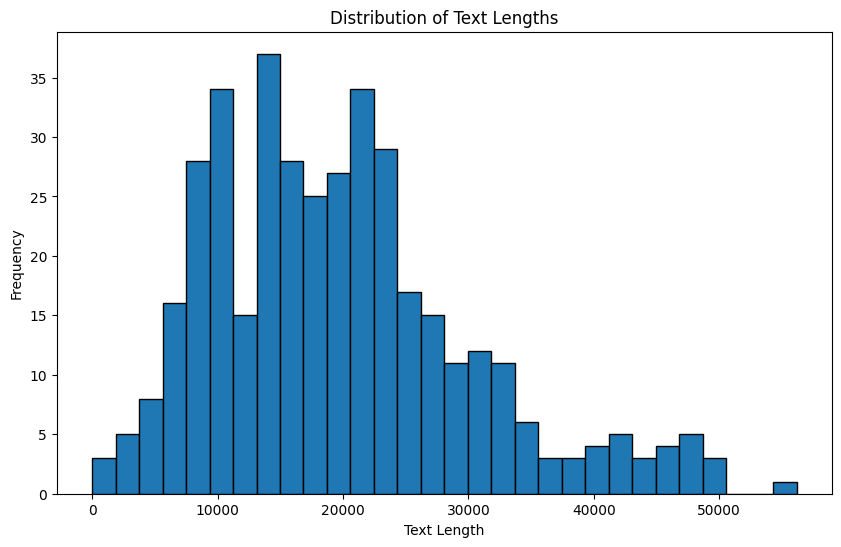


Top 20% of entries with the longest text:
10.1016@S0031-9422(00)89891-X.pdf: 56170 characters
10.1055@s-0034-1368301.pdf: 49954 characters
10.1016@j.biortech.2010.01.041.pdf: 49278 characters
10.1021@jf801103p.pdf: 48971 characters
10.1039@c0ay00008f.pdf: 47887 characters
10.2174@187152010794728620.pdf: 47734 characters
10.1016@j.phytochem.2013.09.022.pdf: 47656 characters
10.1021@cc100076k.pdf: 47651 characters
10.3390@molecules190812031.pdf: 46986 characters
10.1002@elps.201000658.pdf: 46335 characters
10.1016@j.phytochem.2010.05.012.pdf: 45900 characters
10.1016@j.bse.2012.03.005.pdf: 45868 characters
10.1590@S0103-50532004000300008.pdf: 45645 characters
10.1016@j.cbi.2010.08.008.pdf: 44725 characters
10.1002@pca.1208.pdf: 44007 characters
10.1021@jf100233y.pdf: 43187 characters
10.1016@j.jfca.2003.09.013.pdf: 42849 characters
10.1002@jobm.200800093.pdf: 42526 characters
10.1016@j.phytochem.2011.12.016.pdf: 42524 characters
10.1021@np4006822.pdf: 42496 characters
10.1002@ps.1278.pd

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the parquet file
df = pd.read_parquet('extracted_text.parquet')

# Display basic information about the DataFrame
print("DataFrame Info:")
df.info()

# Show the first few rows
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Display summary of text lengths
text_length = df['text'].str.len()
print("\nSummary of text lengths:")
print(text_length.describe())

# Check for empty text fields
empty_texts = df[df['text'].str.strip() == '']
print(f"\nNumber of empty text fields: {len(empty_texts)}")

if not empty_texts.empty:
    print("\nFilenames with empty text fields:")
    print(empty_texts['filename'].tolist())

# Visualize text length distribution
plt.figure(figsize=(10, 6))
plt.hist(text_length, bins=30, edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Output names of entries with the longest text values (top 20%)
# Calculate text lengths
df['text_length'] = df['text'].str.len()

# Sort by text length and get top 20%
top_20_percent = df.sort_values('text_length', ascending=False).head(int(len(df) * 0.2))

print("\nTop 20% of entries with the longest text:")
for _, row in top_20_percent.iterrows():
    print(f"{row['filename']}: {row['text_length']} characters")

# Check for potential encoding issues
print("\nChecking for potential encoding issues:")
for _, row in df.iterrows():
    if not row['text'].isascii():
        print(f"Filename: {row['filename']} might have non-ASCII characters")

# Display unique filenames to check for duplicates
print("\nNumber of unique filenames:", df['filename'].nunique())
if df['filename'].nunique() < len(df):
    print("Duplicate filenames found:")
    print(df['filename'].value_counts()[df['filename'].value_counts() > 1])

# Count and display the number of empty text fields
empty_text_count = df['text'].str.strip().eq('').sum()
print(f"\nNumber of files with empty text: {empty_text_count}")


In [26]:
# Find the longest entry
longest_entry = df.loc[df['text_length'].idxmax()]

print(f"\nFull text of the longest entry (Filename: {longest_entry['filename']}):")
print("=" * 80)
print(longest_entry['text'])
print("=" * 80)
print(f"\nLength: {longest_entry['text_length']} characters")



Full text of the longest entry (Filename: 10.1016@S0031-9422(00)89891-X.pdf):
Phytochemistry. 1971, Vol. 10, pp. 2433 to 2450.
Pergamon  Press.
Printed in England.
THE FLAVONES OF APULEIA LEIOCARPA*t
R. B RAZ FILHO: and 0. R. G~TTLIEB~
Laborat6rio  da Produtos Naturais de Funda@o  de Amparo A Pesquisa do Estado de SLo Paulo, Universidade
de Sgo Paulo, Brasil
(Received 9 July 1970)
Abstract-The wood of Apuleiu leiocurpu (Vog.) Macbr. (Leguminosae, subfamily Caesalpinioideae)
yielded (+)-pinitol, &sitosterol  and ten flavones. Three of these flavones are the known compounds ayanin
(X), oxyayanin-A (VIIIa) and oxyayanin-B (IX). The constitutions of the seven new flavones, apulein  (Ia),
5-O-demethylapulein (Ib), apuleisin (Va), apuleitrin (Via), apuleirin (Vie), apuleidin (VIIa) and 5-O-methyl-
oxyayanin-A (VIIIb) were established. A structural proposal is also advanced for leiocarpin (XVI), a new
pterocarpan  isolated from the bark. The unusual oxygenation pattern of the flavones is dis